<a href="https://colab.research.google.com/github/xinyanLyu/machine-learning/blob/master/HW3_wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Wine

#overview

##Load data

In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing


In [77]:
wine = pd.read_csv("https://raw.githubusercontent.com/xinyanLyu/machine-learning/master/winequality-red.csv")

wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [68]:
wine.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null object
volatile acidity        1599 non-null object
citric acid             1599 non-null object
residual sugar          1599 non-null object
chlorides               1599 non-null object
free sulfur dioxide     1599 non-null object
total sulfur dioxide    1599 non-null object
density                 1599 non-null object
pH                      1599 non-null object
sulphates               1599 non-null object
alcohol                 1599 non-null object
quality                 1599 non-null object
dtypes: object(12)
memory usage: 150.0+ KB


In [3]:
wine.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


#EDA

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


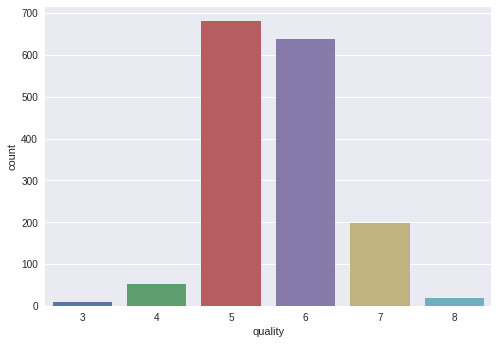

In [4]:
import seaborn as sns
sns.countplot(wine['quality'])

### heatmap

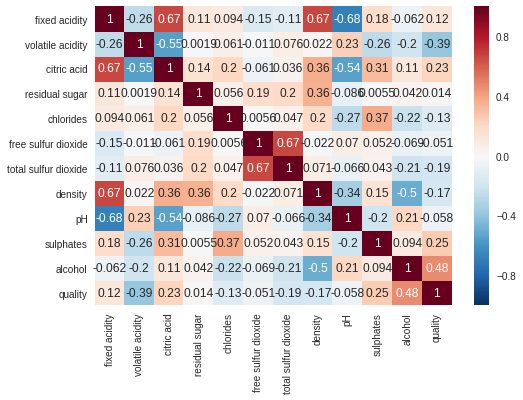

In [5]:
sns.heatmap(wine.corr(), annot=True)

### yellow brick corr plot

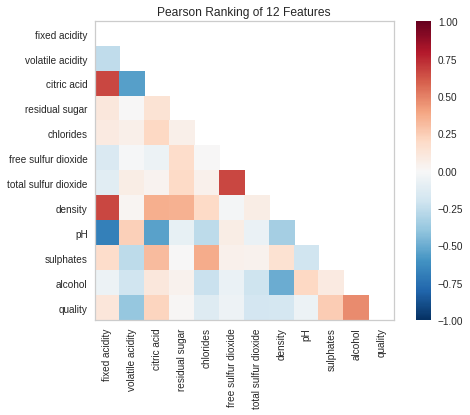

In [6]:
from yellowbrick.features import Rank2D

visualizer = Rank2D(algorithm="pearson")
visualizer.fit_transform(wine)
visualizer.poof()

###pair plot

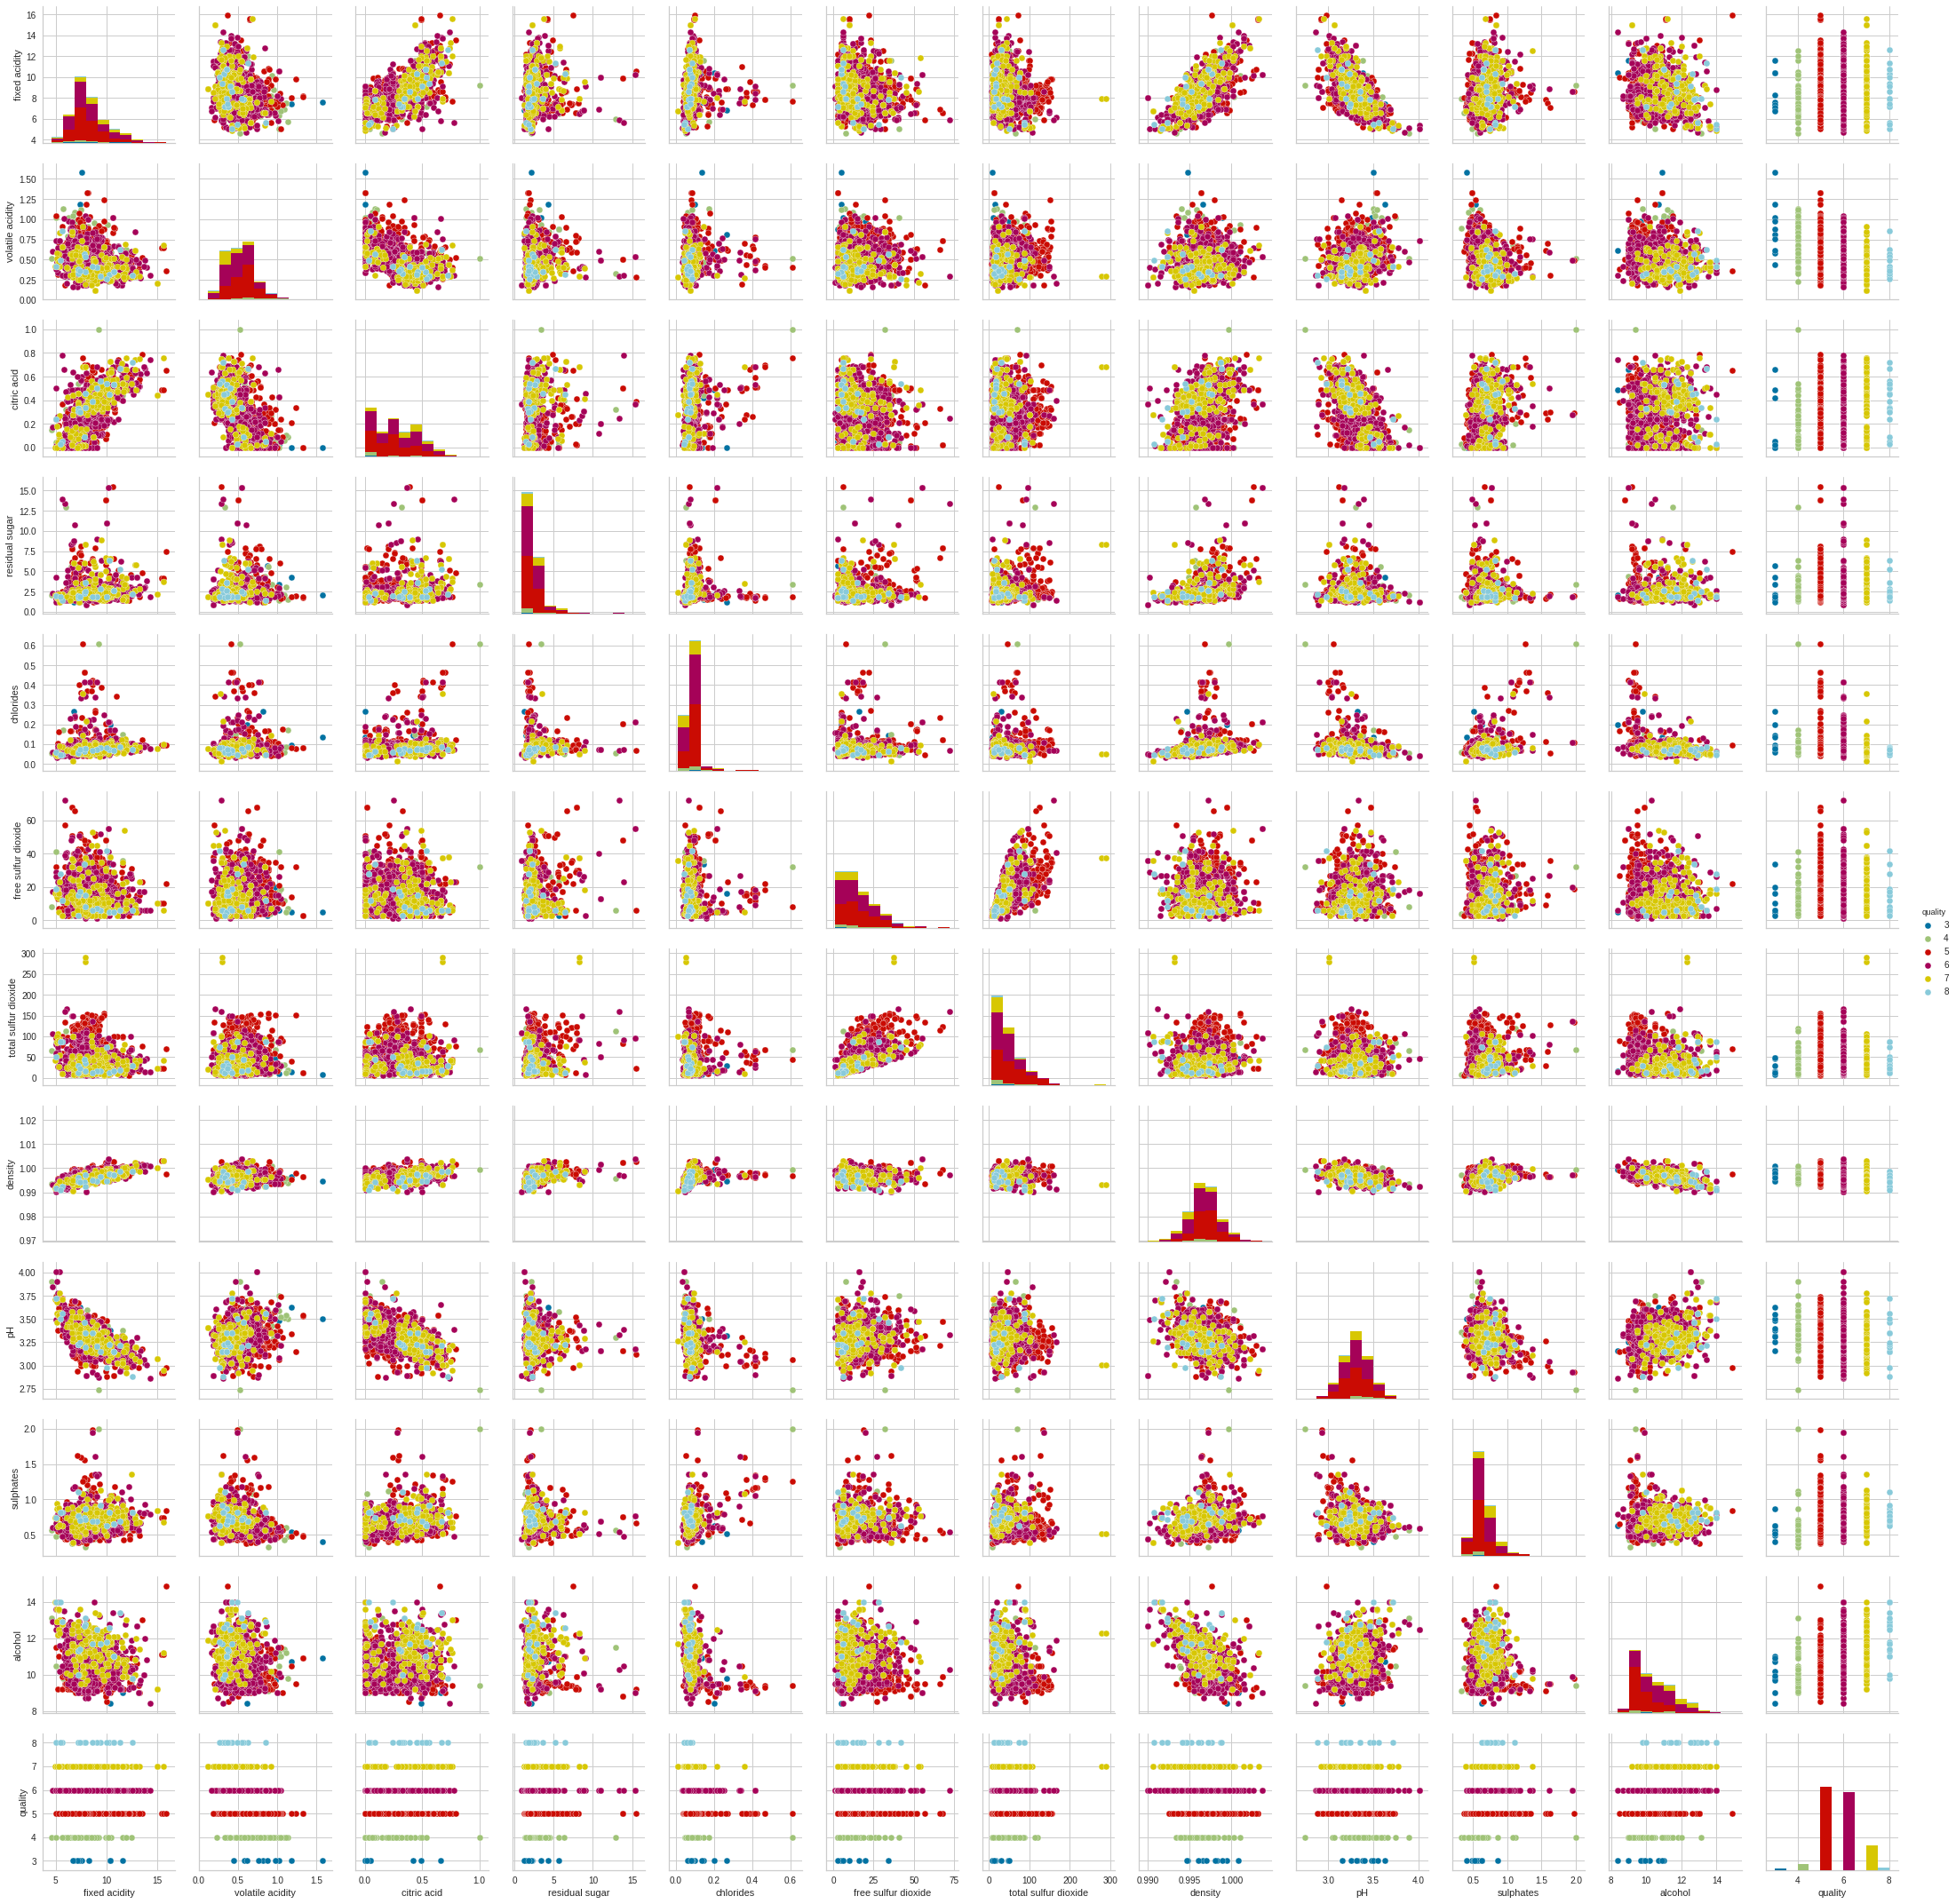

In [7]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"));
sns.pairplot(wine, hue="quality")

###box plot

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


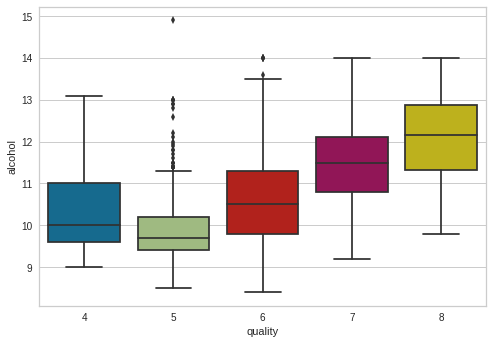

In [8]:
df = wine[wine.quality.isin(wine.quality.value_counts().head(5).index)]

sns.boxplot(
    x='quality',
    y='alcohol',
    data=df
)

###ggplot

In [0]:
!pip -q install ggplot
from ggplot import *


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

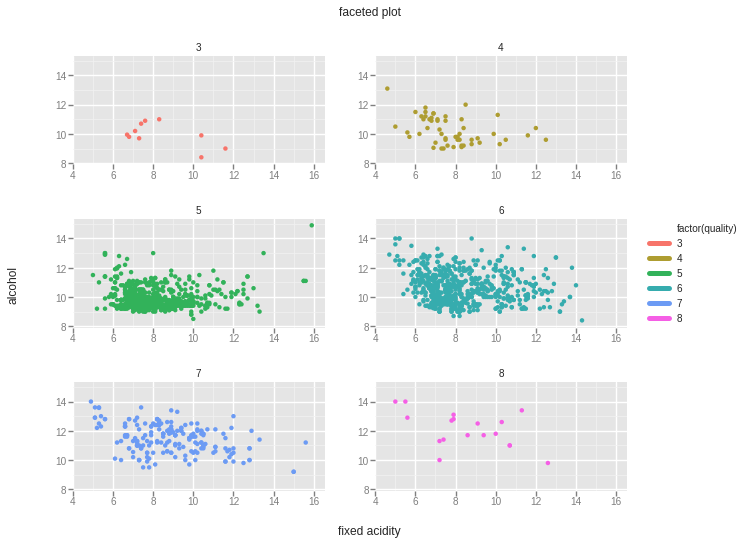

<ggplot: (8789011856623)>

In [80]:
ggplot(wine, aes(x="fixed acidity", y="alcohol",
                 color="factor(quality)")) + geom_point(size=20)+ ggtitle('faceted plot')+facet_wrap('quality')
                 

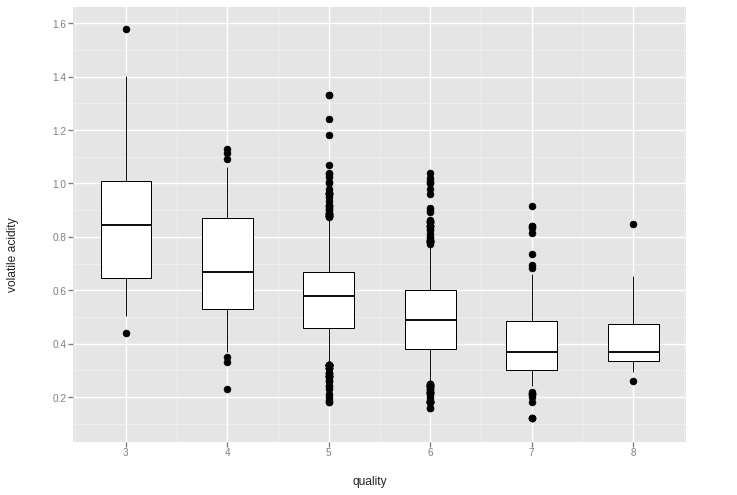

<ggplot: (8789015661751)>

In [19]:
ggplot(wine, aes(x='quality', y='volatile acidity'))+geom_boxplot()

#Create train and test dataset

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
#Specify the features of interest and the classes of the target
features = ["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides",  "free sulfur dioxide", "total sulfur dioxide","density","pH","sulphates","alcohol"]

# Extract the instances and target
X = wine[features]
Y = wine.quality



In [0]:
# Create the train and test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [65]:
X_train.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000
mean,8.310321,0.528913,0.271415,2.563643,0.087718,15.908522,46.964034,0.996733,3.308389,0.658640,10.423599
std,1.730406,0.178354,0.195813,1.454658,0.047950,10.483622,33.756491,0.001894,0.153138,0.174669,1.063996
min,4.900000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.390000,0.100000,1.900000,0.070000,7.000000,22.000000,0.995580,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,14.000000,38.000000,0.996760,3.310000,0.620000,10.200000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,22.000000,63.000000,0.997825,3.400000,0.730000,11.100000
max,15.900000,1.330000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000


In [64]:

Y_train.describe()

count    1279.000000
mean        5.641908
std         0.802965
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64

In [66]:
X_test.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000
mean,8.356875,0.523453,0.269219,2.439531,0.086462,15.740625,44.484375,0.996800,3.322000,0.656188,10.420521
std,1.785456,0.182068,0.190996,1.211792,0.043407,10.381058,29.165183,0.001862,0.159056,0.147308,1.073994
min,4.600000,0.180000,0.000000,1.200000,0.039000,3.000000,8.000000,0.991500,2.890000,0.390000,8.400000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,8.000000,22.000000,0.995695,3.220000,0.550000,9.500000
50%,7.900000,0.530000,0.260000,2.200000,0.079000,13.000000,38.000000,0.996710,3.310000,0.620000,10.100000
75%,9.325000,0.626250,0.430000,2.500000,0.090000,21.000000,60.000000,0.997870,3.410000,0.730000,11.075000
max,15.000000,1.580000,0.740000,13.800000,0.422000,57.000000,143.000000,1.002890,4.010000,1.170000,14.000000


In [67]:
Y_test.describe()

count    320.000000
mean       5.612500
std        0.826577
min        3.000000
25%        5.000000
50%        6.000000
75%        6.000000
max        8.000000
Name: quality, dtype: float64

## sklearn linear regression model to predict quality score

In [42]:
from sklearn import linear_model
lm = linear_model.LinearRegression()
#train model
lm.fit(X_train, Y_train)
#
print('coefficient:', lm.coef_)

coefficient: [ 4.76590043e-02 -1.06926365e+00 -1.53975218e-01  8.64724900e-03
 -1.68189208e+00  4.97238751e-03 -2.73873078e-03 -2.66491179e+01
 -2.93016950e-01  7.92315875e-01  2.76699099e-01]


In [43]:
#Prediction of train dataset and test dataset
train_pred = lm.predict(X_train)
test_pred  = lm.predict(X_test)

#error
print("standard error of train dataset:%.2f" % np.mean((train_pred-Y_train)**2))

print("standard error of test dataset:%.2f" % np.mean((test_pred-Y_test)**2))

print("prediction score:%.2f" % lm.score(X_test, Y_test))


standard error of train dataset:0.41
standard error of test dataset:0.44
prediction score:0.36


##ols model

In [49]:
import statsmodels.formula.api as smf
model = smf.OLS(Y_train,X_train)
fit = model.fit()
print (fit.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     8934.
Date:                Fri, 25 Jan 2019   Prob (F-statistic):               0.00
Time:                        06:07:43   Log-Likelihood:                -1250.4
No. Observations:                1279   AIC:                             2523.
Df Residuals:                    1268   BIC:                             2579.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
fixed acidity            0.0187 

quality ~fixed acidity + volatile acidity + citric acid + residual sugar + chlorides + free sulfur dioxide + total sulfur dioxide + density + pH + sulphates + alcohol

##create new wine dataset

In [0]:
def set_type(df):
    df.loc[ df.quality > 6 ] = "good"
    df.loc[ df.quality <= 6 ] = "ac"
    return df

In [0]:

newwine = set_type(wine)
newwine.head()